### Header with description

**Improvements on First model:**
* Increased batch size from 32 to 128 that in turn increased the probability of inclusion of samples of all the classes
* Added batch normalization except after the last convolution layer
* Altered the optimizor with a fixed learning rate


**What could have gone wrong for what I got:**
* The model is overfitting, hence there is a need of image augmentation or dropout
* Increase in batch size did not help much, however we can keep it for further testing as it better represents sampling from all the classes
* A fixed learning rate did not help much. May be ReduceLROnPlatau or LRScheduler will help
* Most importantly I think the network itself is not powerful enough and I can try making it deeper with more layers

### Import Libraries and modules

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


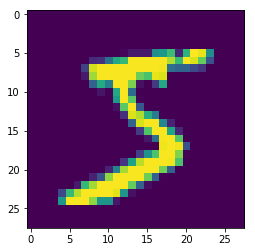

In [14]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [17]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [19]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Build model

In [31]:
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Convolution2D(20, 3, 3, activation='relu', input_shape=(28,28,1), use_bias=False)) #OutputChannelSize=26, RF=3x3
model.add(BatchNormalization())
model.add(Convolution2D(40, 3, 3, activation='relu', use_bias=False))  #OutputChannelSize=24, RF=5x5
model.add(BatchNormalization())
model.add(Convolution2D(10, 1, activation='relu')) #OutputChannelSize=24, RF=5x5
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))  #OutputChannelSize=12, RF=10x10

model.add(Convolution2D(20, 3, 3, activation='relu', use_bias=False))  #OutputChannelSize=10, RF=12x12
model.add(BatchNormalization())
model.add(Convolution2D(10, 1, activation='relu', use_bias=False))  #OutputChannelSize=10, RF=12x12
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))  #OutputChannelSize=5, RF=24x24

model.add(Convolution2D(10, 5, use_bias=False))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(40, (3, 3), activation="relu", use_bias=False)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu", use_bias=False)`
  


In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 20)        180       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 20)        80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 40)        7200      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 40)        160       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 10)        410       
_________________________________________________________________
batch_normalization_3 (Batch (None, 24, 24, 10)        40        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 10)        0         
__________

### Checkpoint Configuration

In [24]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!pip install -q h5py pyyaml
from keras.models import model_from_json

In [26]:
!ls "/content/gdrive/My Drive/EVA"

S3V2  S4


In [0]:
from keras.callbacks import *
filepath="/content/gdrive/My Drive/EVA/S4/SECOND/epochs:{epoch:03d}-val_acc:{val_acc:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')

In [0]:
callbacks_list = [checkpoint]

### Compile and Train the model

Fixing the learning rate with 0.003

In [0]:
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.003),
             metrics=['accuracy'])

In [33]:
model.fit(X_train, Y_train, batch_size=128, validation_data=(X_test, Y_test), nb_epoch=40, callbacks=callbacks_list, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 6s 98us/step - loss: 0.1589 - acc: 0.9520 - val_loss: 0.0530 - val_acc: 0.9825

Epoch 00001: val_acc improved from -inf to 0.98250, saving model to /content/gdrive/My Drive/EVA/S4/SECOND/epochs:001-val_acc:0.9825.hdf5
Epoch 2/40
60000/60000 [==============================] - 5s 82us/step - loss: 0.0514 - acc: 0.9838 - val_loss: 0.0534 - val_acc: 0.9832

Epoch 00002: val_acc improved from 0.98250 to 0.98320, saving model to /content/gdrive/My Drive/EVA/S4/SECOND/epochs:002-val_acc:0.9832.hdf5
Epoch 3/40
60000/60000 [==============================] - 5s 83us/step - loss: 0.0398 - acc: 0.9872 - val_loss: 0.0459 - val_acc: 0.9846

Epoch 00003: val_acc improved from 0.98320 to 0.98460, saving model to /content/gdrive/My Drive/EVA/S4/SECOND/epochs:003-val_acc:0.9846.hdf5
Epoch 4/40
60000/60000 [==============================] - 5s 89us/step - loss: 0.0349 - acc: 0.9889 - val_loss: 0.03

### Load the best model and evaluate on test data

In [0]:
from keras.models import load_model
# Take the best saved model as printed in the above code block
modelPath = r'/content/gdrive/My Drive/EVA/S4/SECOND/epochs:016-val_acc:0.9919.hdf5'
model = load_model(modelPath)

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [36]:
print(score)

[0.031064972091876916, 0.9919]


In [0]:
y_pred = model.predict(X_test)

In [38]:
print(y_pred[:9])
print(y_test[:9])

[[3.90132994e-13 2.02039533e-14 1.03564286e-08 5.98143046e-08
  3.52768336e-18 4.91404131e-14 1.85337700e-20 9.99999881e-01
  9.07648387e-14 8.18718870e-09]
 [1.21506172e-09 1.38677347e-09 1.00000000e+00 1.26125568e-10
  3.94372179e-09 7.29227340e-17 1.00175228e-08 4.30803448e-11
  3.01291436e-10 3.12946960e-11]
 [7.16214414e-12 9.99994993e-01 2.93606334e-10 8.77617586e-13
  4.87540501e-06 1.45035234e-10 2.56500571e-10 8.59485283e-08
  1.09620952e-08 3.91694677e-09]
 [9.99996901e-01 1.69842255e-19 6.19988002e-12 1.51780132e-13
  2.00039052e-12 1.49919410e-10 3.08150834e-06 1.24496862e-13
  2.86810167e-08 5.76577586e-09]
 [1.83872602e-16 1.04368565e-12 5.14153531e-15 9.69555162e-15
  9.99999762e-01 1.20137963e-13 1.11753525e-15 2.04309833e-12
  3.39894866e-12 2.52418602e-07]
 [6.20098504e-12 9.99992013e-01 3.33134631e-11 2.46425127e-14
  7.88349280e-06 1.62846394e-13 6.26975347e-11 1.34669051e-07
  2.89488988e-09 2.57260713e-10]
 [1.03210530e-18 5.33262844e-12 3.17263195e-11 2.74469661e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

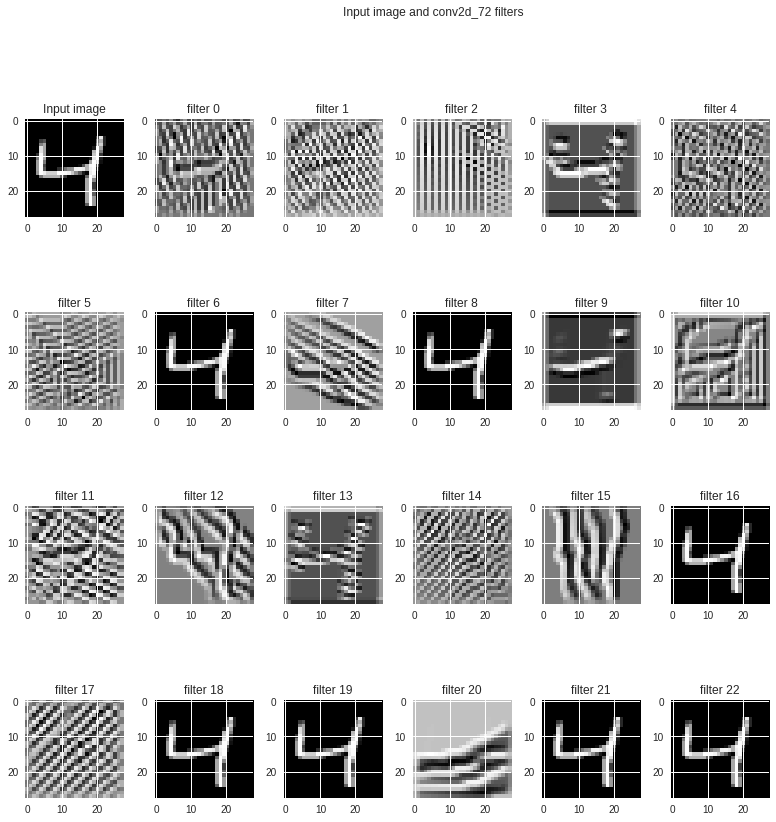

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_72'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()